In [1]:
import pandas as pd

In [ ]:
df_players = pd.read_csv('jugadores_cebollitas.csv')
df_players.head()


,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047


In [3]:
X = df_players[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df_players['PC1'] = components[:, 0]
df_players['PC2'] = components[:, 1]

<Axes: xlabel='PC1', ylabel='PC2'>

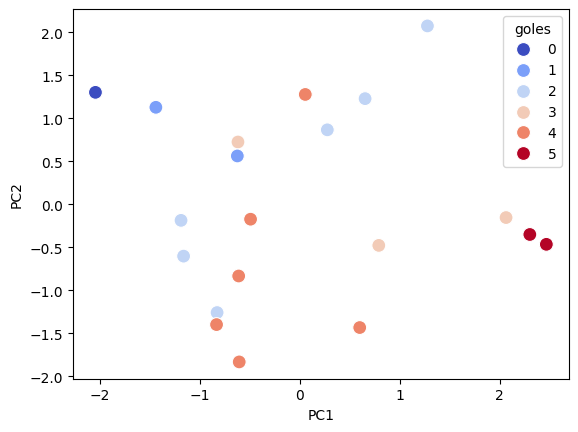

In [7]:
import seaborn as sns

sns.scatterplot(data=df_players, x='PC1', y='PC2', hue='goles', palette='coolwarm', s=100)

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_players['Cluster'] = kmeans.fit_predict(X_scaled)

c:\Users\jaayg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='PC1', ylabel='PC2'>

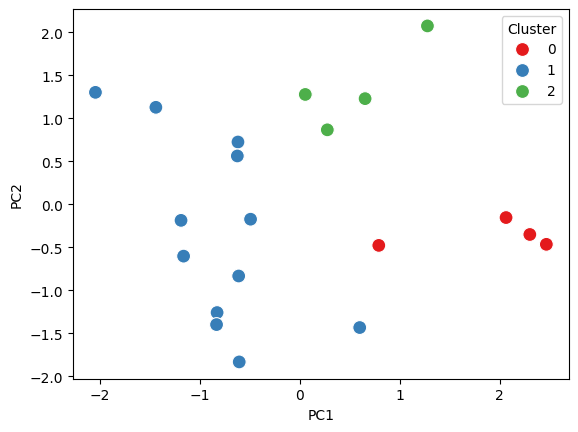

In [9]:
sns.scatterplot(data=df_players, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100)

In [10]:
varrience = pca.explained_variance_ratio_

print(f"Explained variance by PC1: {varrience[0]:.2f}, PC2: {varrience[1]:.2f}")
print(f"Total explained variance: {varrience.sum():.2f}")

Explained variance by PC1: 0.39, PC2: 0.28
Total explained variance: 0.67


In [12]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

def explore_components(ax_x, ax_y):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_players, x=ax_x, y=ax_y, hue='Cluster', palette='Set2', s=100)
    plt.title(f'Scatter plot of {ax_x} vs {ax_y}')
    plt.xlabel(ax_x)
    plt.ylabel(ax_y)
    plt.legend(title='Cluster')
    plt.show()

widgets.interactive(
    explore_components,
    ax_x=['PC1','PC2','goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco'],
    ax_y=['PC1','PC2', 'goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']
)

interactive(children=(Dropdown(description='ax_x', options=('PC1', 'PC2', 'goles', 'asistencias', 'pases_compl…